# Future Sales Prediction 
Our goal is to predict product sales from TV, radio, and newspaper advertising spend using machine learning.

[Future Sales Prediction with Machine Learning (Aman Kharwal)](https://amanxai.com/2022/03/01/future-sales-prediction-with-machine-learning/)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS528AS8yIERj5h658ur8BMLaUx7vC2rYFQfw&s" alt="" width="450">


## Read Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

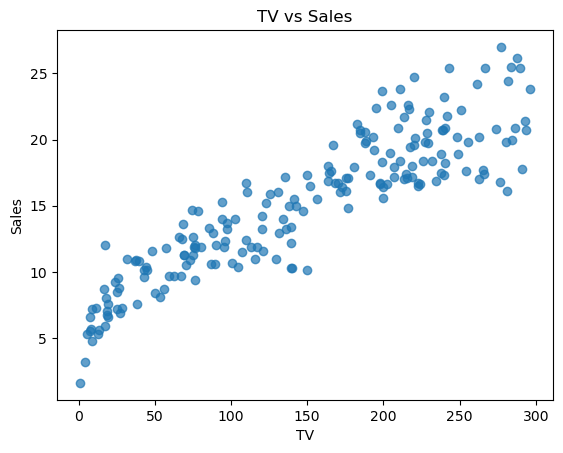

In [9]:
plt.scatter(df['TV'], df['Sales'], alpha=0.7)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

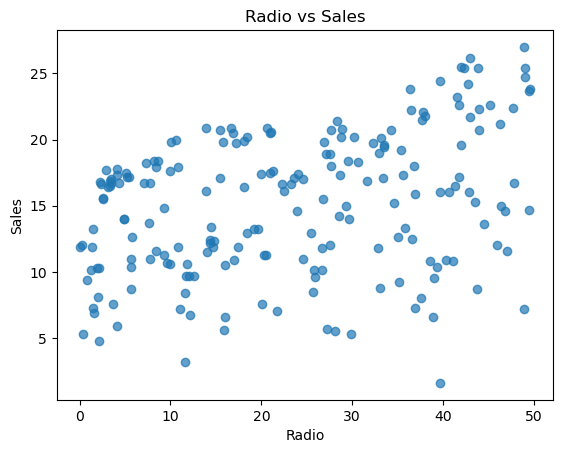

In [10]:
plt.scatter(df['Radio'], df['Sales'], alpha=0.7)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.show()

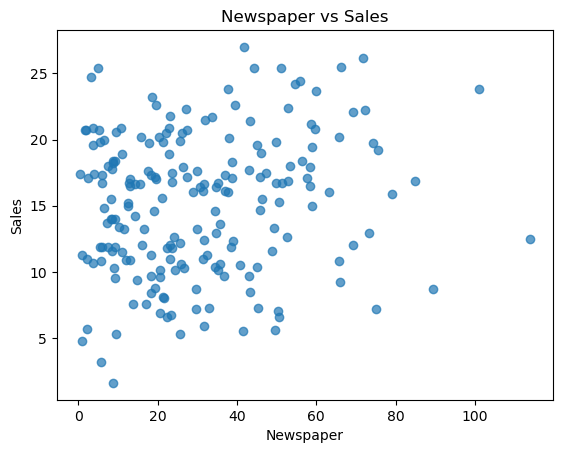

In [11]:
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.7)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.show()

In [12]:
df.corr(numeric_only=True)["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

## Modelling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
x = df[['TV','Radio','Newspaper']]

y = df['Sales']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
Lr = LinearRegression() 

In [17]:
model=Lr.fit(x_train,y_train)

In [18]:
tahmin = model.predict(x_test)

In [19]:
mean_squared_error(y_test, tahmin)

2.9077569102710896

In [20]:
mean_absolute_error(y_test, tahmin)

1.2748262109549338

In [21]:
r2_score(y_test, tahmin)

0.9059011844150826

In [24]:
def predict_sales(tv: float, radio: float, newspaper: float) -> float:
    yeni = pd.DataFrame([[tv, radio, newspaper]], columns=x.columns)
    return float(model.predict(yeni)[0])

In [25]:
print(predict_sales(230.1, 37.8, 69.2))

21.372540280396883


In [26]:
import joblib
joblib.dump(model, "sales_model.joblib")

['sales_model.joblib']

## Conclusion
We trained a Linear Regression model to predict sales from TV, Radio, and Newspaper ad spend. On the test set, we achieved MSE = 2.998, MAE = 1.275, and R² = 0.906. For the input (230.1, 37.8, 69.2), the model predicts ≈ 21.37 units.